# Machie Learning: Regression

This notebook highlights the steps taken to build a regression model as part of the IBM Machine Learning Professional Certificate.

The dataset used will be the Ford Car Price Dataset. This dataset was obtained from Kaggle. Please <a href="https://www.kaggle.com/datasets/adhurimquku/ford-car-price-prediction"> click here</a> to access the full dataset Subsequently, this dataset will be used to create several regression models that will be compared. It is important to note that these models were built to predict the price of a ford vehicle.

## Data Attributes

Attribute Information:
1. model - Ford Car Brands
2. year - Production Year
3. price - Price of car in $
4. transmission - Automatic,Manual, Semi-Auto
5. mileage - Number of miles traveled
6. fuel_Type - Petrol,Diesel,Hybrid,Electric,Other
7. tax - Annual Tax
8. mpg - Miles per Gallon
9. engineSize - Car's Engine Size

In [1]:
!pip install seaborn

You should consider upgrading via the 'C:\Users\chuce\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [4]:
# load the data
file = open('ford.csv')
data = pd.read_csv(file)
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


## Exploratory Data Analysis

In [5]:
data.shape

(17966, 9)

In [6]:
# list the columns
data.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [7]:
# determine data types
data.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [8]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [9]:
data.describe(include = "all")

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
count,17966,17966.000000,17966.000000,17966,17966.000000,17966,17966.000000,17966.000000,17966.000000
unique,24,NaN,NaN,3,NaN,5,NaN,NaN,NaN
top,Fiesta,NaN,NaN,Manual,NaN,Petrol,NaN,NaN,NaN
freq,6557,NaN,NaN,15518,NaN,12179,NaN,NaN,NaN
mean,NaN,2016.866470,12279.534844,NaN,23362.608761,NaN,113.329456,57.906980,1.350807
std,NaN,2.050336,4741.343657,NaN,19472.054349,NaN,62.012456,10.125696,0.432367
min,NaN,1996.000000,495.000000,NaN,1.000000,NaN,0.000000,20.800000,0.000000
25%,NaN,2016.000000,8999.000000,NaN,9987.000000,NaN,30.000000,52.300000,1.000000
50%,NaN,2017.000000,11291.000000,NaN,18242.500000,NaN,145.000000,58.900000,1.200000
75%,NaN,2018.000000,15299.000000,NaN,31060.000000,NaN,145.000000,65.700000,1.500000


In [10]:
# check for null values
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

No null values present!

In [20]:
# Counting unique values
data['model'].value_counts()

 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Focus                        1
Name: model, dtype: int64

There are whitespaces to the left of most of the entries in the 'model' column. We want to remove this extra space.

In [44]:
data['model'] = data['model'].str.strip()
data['model'].value_counts()

Fiesta                   6556
Focus                    4589
Kuga                     2225
EcoSport                 1143
C-MAX                     543
Ka+                       531
Mondeo                    525
B-MAX                     355
S-MAX                     296
Grand C-MAX               247
Galaxy                    228
Edge                      208
KA                        199
Puma                       80
Tourneo Custom             69
Grand Tourneo Connect      59
Mustang                    57
Tourneo Connect            33
Fusion                     16
Streetka                    2
Ranger                      1
Escort                      1
Transit Tourneo             1
Name: model, dtype: int64

lovely!

In [21]:
data['transmission'].value_counts()

Manual       15518
Automatic     1361
Semi-Auto     1087
Name: transmission, dtype: int64

In [22]:
data['fuelType'].value_counts()

Petrol      12179
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: fuelType, dtype: int64

In [69]:
data['engineSize'].value_counts()

1.0    7765
1.5    3418
2.0    3310
1.2    1626
1.6     923
1.1     559
1.4     111
2.3      80
0.0      51
5.0      45
1.8      35
2.2      13
2.5      13
1.3      13
3.2       1
1.7       1
Name: engineSize, dtype: int64

In [42]:
data.drop(data.index[(data["fuelType"] == 'Other')],axis=0,inplace=True)

In [63]:
# counting model years
data['year'].value_counts()

2017    4888
2018    4014
2019    3194
2016    2331
2015    1368
2014     805
2013     609
2020     258
2012     115
2011      94
2009      91
2010      67
2008      57
2007      32
2005      16
2006      13
2004       4
2002       3
2003       3
1998       1
1996       1
2000       1
2060       1
Name: year, dtype: int64

In [64]:
# remove the the row that has model year of 2060
data.drop(data.index[(data["year"] > 2021)],axis=0,inplace=True)
data.shape

(17965, 9)

In [65]:
data.groupby(data['model'])['price'].mean().round(2).sort_values(ascending=False)

model
Mustang                  34631.26
Edge                     22810.50
Puma                     21447.25
Tourneo Custom           21165.99
Galaxy                   17841.87
S-MAX                    17720.23
Kuga                     15823.47
Grand Tourneo Connect    14874.92
Ranger                   14495.00
Tourneo Connect          13805.82
Focus                    13184.82
EcoSport                 12499.27
Transit Tourneo          12450.00
Mondeo                   12302.86
Grand C-MAX              10881.57
Fiesta                   10196.86
C-MAX                     9914.57
Ka+                       8707.86
B-MAX                     8287.53
KA                        5186.13
Escort                    3000.00
Fusion                    2555.81
Streetka                  1924.50
Name: price, dtype: float64

## Visualizing the data

Text(0.5, 1.0, 'Mileage Counts')

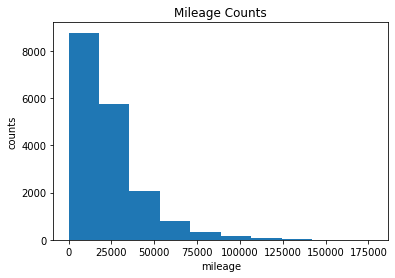

In [32]:
# showing the distribution of mileage
plt.hist(data['mileage'])
plt.xlabel('mileage')
plt.ylabel('counts')
plt.title('Mileage Counts')

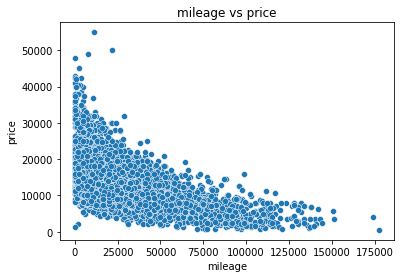

In [34]:
# Comparing mileage to price
sns.scatterplot(x='mileage', y='price', data=data)
plt.xlabel('mileage')
plt.ylabel('price')
plt.title('mileage vs price')
plt.show()

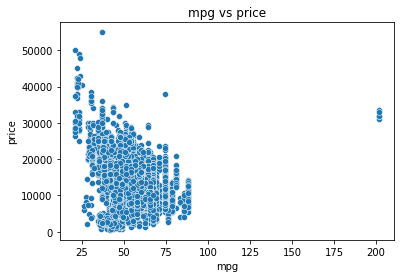

In [35]:
# Comparing mpg to price
sns.scatterplot(x='mpg', y='price', data=data)
plt.xlabel('mpg')
plt.ylabel('price')
plt.title('mpg vs price')
plt.show()

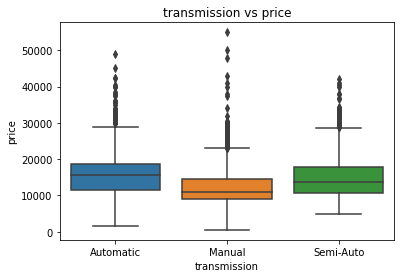

In [36]:
# Comparing transmission to price
sns.boxplot(x='transmission', y='price', data=data)
plt.xlabel('transmission')
plt.ylabel('price')
plt.title('transmission vs price')
plt.show()

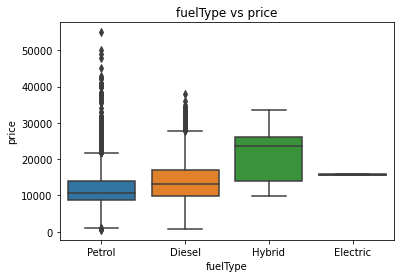

In [43]:
# Comparing fuel type to price
sns.boxplot(x='fuelType', y='price', data=data)
plt.xlabel('fuelType')
plt.ylabel('price')
plt.title('fuelType vs price')
plt.show()

## One hot encoding
We want to one hot encode the model, fuel type and transmission to prepare the data for use in a machine learning model.

In [46]:
dummy_mod = pd.get_dummies(data['model'], prefix='model')
dummy_mod.head()

,model_B-MAX,model_C-MAX,model_EcoSport,model_Edge,model_Escort,model_Fiesta,model_Focus,model_Fusion,model_Galaxy,model_Grand C-MAX,...,model_Kuga,model_Mondeo,model_Mustang,model_Puma,model_Ranger,model_S-MAX,model_Streetka,model_Tourneo Connect,model_Tourneo Custom,model_Transit Tourneo
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
dummy_FT = pd.get_dummies(data['fuelType'], prefix='model')
dummy_FT.head()

,model_Diesel,model_Electric,model_Hybrid,model_Petrol
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [45]:
dummy_tr = pd.get_dummies(data['transmission'], prefix='transmission')
dummy_tr.head()

,transmission_Automatic,transmission_Manual,transmission_Semi-Auto
0,1,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,1,0,0


In [67]:
data = pd.concat([data, dummy_mod, dummy_tr, dummy_FT], axis=1)
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,model_B-MAX,...,model_Tourneo Connect,model_Tourneo Custom,model_Transit Tourneo,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,model_Diesel,model_Electric,model_Hybrid,model_Petrol
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0,0,...,0,0,0,1,0,0,0,0,0,1
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0,0,...,0,0,0,0,1,0,0,0,0,1
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0,0,...,0,0,0,0,1,0,0,0,0,1
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5,0,...,0,0,0,0,1,0,0,0,0,1
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0,0,...,0,0,0,1,0,0,0,0,0,1


## Machine Learning

After completing the preprocessing phase, the following features were selected to build the regression models:

* model
* year
* transmission
* mileage
* fuel type
* mpg
* engine size

These features were used to predict the price of a Ford vehicle. The features were scaled and and then used to train the regression models.

Several regression models were created with the features mentioned above. The first model was a multi variable linear regression model. This model was used as a baseline to gauge the accuracy of an untuned model. Furthermore, six ridge regression models were created with alpha values ranging from 0.001 – 100. These ridge regression models were used to determine how tuning a hyperparameter would improve the accuracy of the predictions.

In [31]:
# defining the features
features = data.drop(['model','transmission','fuelType','tax', 'price'], axis=1)
X = features

# define the target variable
target = data['price']
Y = target

In [32]:
# scalling the features
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(features).transform(features)
X[0:5]

array([[ 0.06512772, -0.38099808, -0.02044162, -0.81138621],
       [ 0.55286624, -0.73335899, -0.02044162, -0.81138621],
       [ 0.06512772, -0.56013157, -0.02044162, -0.81138621],
       [ 1.04060476, -0.6626403 , -1.73888989,  0.34507023],
       [ 1.04060476, -1.12372415, -0.90929417, -0.81138621]])

In [33]:
# creating training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge

reg_model = []
scores = []

lr = LinearRegression()

# no regularization
lr = lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)
label = 'no regularizatio'
reg_model.append(label)
scores.append(r2_score(Y_test, y_pred))

# using ridge
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alphas:
    rr = Ridge(alpha = alpha).fit(X_train, Y_train)
    y_pred_rr = rr.predict(X_test)
    label_rr = 'RR with alpha of '+ str(alpha)
    reg_model.append(label_rr)
    scores.append(r2_score(Y_test, y_pred_rr))
    
scores_df = pd.DataFrame({'reg models':reg_model, 'scores': scores})
scores_df 
    

,reg models,scores
0,no regularizatio,0.680410
1,RR with alpha of 0.001,0.680410
2,RR with alpha of 0.01,0.680410
3,RR with alpha of 0.1,0.680411
4,RR with alpha of 1,0.680419
5,RR with alpha of 10,0.680496
6,RR with alpha of 100,0.681225


## Conclusion

As this model was built for predictability, ridge regression was used as the regularization technique. As can be seen from the 'scores_df' dataframe, increasing alpha increases the accuracy of the model. 

Increasing the alpha value reduces the complexity of the model and improves the model's ability to predict unseen data.

It is important to note that this model can be improved by:
* Performing cross validation as doing this will make the model more statistically significant as errors are more generalized across multiple test sets

* Using log transform to transform skewed distributions in the dataset to a normal distribution

* Training the model with more data